In [2]:
tee = c(1, 1, 1, 2, 2, 3, 4, 5, 5, 6, 6, 7, 7, 7, 7)
at1 = c(1, 1, 1, 2, 2, 3, 4, 5, 5)
at2 = c(6, 6, 7, 7, 7, 7)
bt1 = c(1, 1, 1, 2, 2, 3, 4)
bt2 = c(5, 5, 6, 6, 7, 7, 7, 7)

$$SDR=sd(T)-\sum_{i}{\frac{|T_i|}{|T|}\times\ sd(T_i)}$$

In [ ]:
# sd - standard deviation of the values in set T, while T_1, ... ,T_n
# are the sets of values resulting from a split on a feature
# |T| - number of observations in set T

In [8]:
sdr_a = sd(tee) - (length(at1) / length(tee) * sd(at1) + length(at2) /
                   length(tee) * sd(at2))
sdr_b = sd(tee) - (length(bt1) / length(tee) * sd(bt1) + length(bt2) /
                  length(tee) * sd(bt2))

In [9]:
sdr_a

[1] 1.202815

In [10]:
sdr_b

[1] 1.392751

In [11]:
wine = read.csv('../../R_projects//MLwR/Machine Learning with R (2nd Ed.)//Chapter 06/whitewines.csv')

In [12]:
str(wine)

'data.frame':	4898 obs. of  12 variables:
 $ fixed.acidity       : num  6.7 5.7 5.9 5.3 6.4 7 7.9 6.6 7 6.5 ...
 $ volatile.acidity    : num  0.62 0.22 0.19 0.47 0.29 0.14 0.12 0.38 0.16 0.37 ...
 $ citric.acid         : num  0.24 0.2 0.26 0.1 0.21 0.41 0.49 0.28 0.3 0.33 ...
 $ residual.sugar      : num  1.1 16 7.4 1.3 9.65 0.9 5.2 2.8 2.6 3.9 ...
 $ chlorides           : num  0.039 0.044 0.034 0.036 0.041 0.037 0.049 0.043 0.043 0.027 ...
 $ free.sulfur.dioxide : num  6 41 33 11 36 22 33 17 34 40 ...
 $ total.sulfur.dioxide: num  62 113 123 74 119 95 152 67 90 130 ...
 $ density             : num  0.993 0.999 0.995 0.991 0.993 ...
 $ pH                  : num  3.41 3.22 3.49 3.48 2.99 3.25 3.18 3.21 2.88 3.28 ...
 $ sulphates           : num  0.32 0.46 0.42 0.54 0.34 0.43 0.47 0.47 0.47 0.39 ...
 $ alcohol             : num  10.4 8.9 10.1 11.2 10.9 ...
 $ quality             : int  5 6 6 4 6 6 6 6 6 7 ...


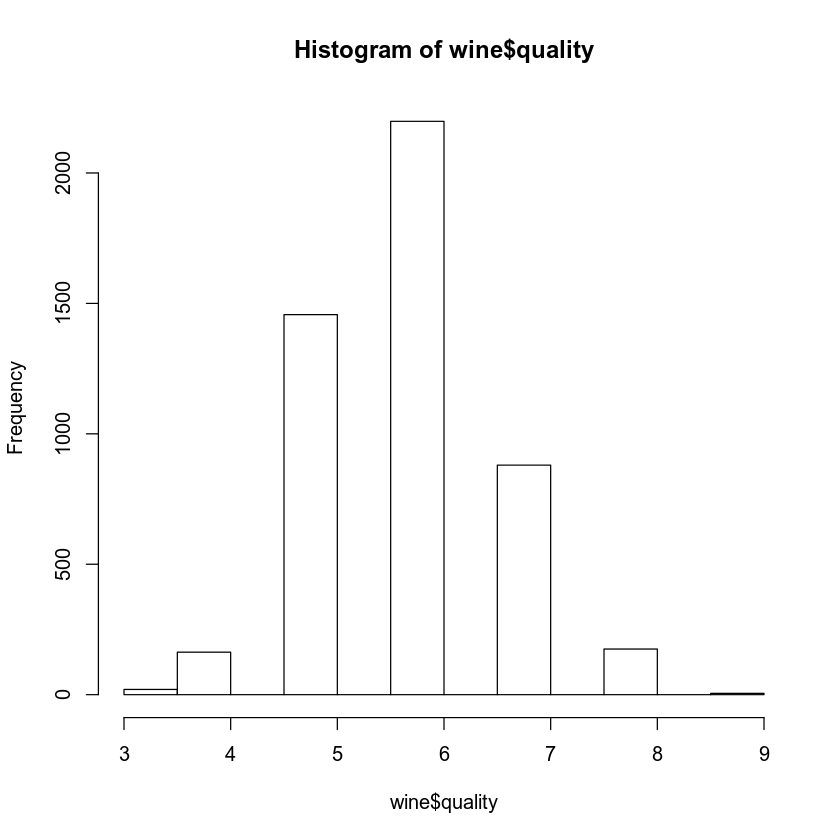

In [13]:
hist(wine$quality)

In [14]:
wine_train = wine[1:3750, ]
wine_test = wine[3751:4898, ]

In [16]:
library(rpart)

In [19]:
# rpart(dv ~ iv, data)
# predict(m, test, type='vector')

In [20]:
m.rpart = rpart(quality ~ ., data = wine_train)

In [21]:
m.rpart

n= 3750 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 3750 2945.53200 5.870933  
   2) alcohol< 10.85 2372 1418.86100 5.604975  
     4) volatile.acidity>=0.2275 1611  821.30730 5.432030  
       8) volatile.acidity>=0.3025 688  278.97670 5.255814 *
       9) volatile.acidity< 0.3025 923  505.04230 5.563380 *
     5) volatile.acidity< 0.2275 761  447.36400 5.971091 *
   3) alcohol>=10.85 1378 1070.08200 6.328737  
     6) free.sulfur.dioxide< 10.5 84   95.55952 5.369048 *
     7) free.sulfur.dioxide>=10.5 1294  892.13600 6.391036  
      14) alcohol< 11.76667 629  430.11130 6.173291  
        28) volatile.acidity>=0.465 11   10.72727 4.545455 *
        29) volatile.acidity< 0.465 618  389.71680 6.202265 *
      15) alcohol>=11.76667 665  403.99400 6.596992 *

In [22]:
# any wine samples with alcohol < 10.85 and volatile.acidity < .2275
# would therefore be predicted to have a quality of 5.97

In [24]:
summary(m.rpart)

Call:
rpart(formula = quality ~ ., data = wine_train)
  n= 3750 

          CP nsplit rel error    xerror       xstd
1 0.15501053      0 1.0000000 1.0008037 0.02447369
2 0.05098911      1 0.8449895 0.8519743 0.02345315
3 0.02796998      2 0.7940004 0.8051461 0.02268511
4 0.01970128      3 0.7660304 0.7850306 0.02178670
5 0.01265926      4 0.7463291 0.7695115 0.02128838
6 0.01007193      5 0.7336698 0.7606845 0.02132508
7 0.01000000      6 0.7235979 0.7562329 0.02105667

Variable importance
             alcohol              density     volatile.acidity 
                  34                   21                   15 
           chlorides total.sulfur.dioxide  free.sulfur.dioxide 
                  11                    7                    6 
      residual.sugar            sulphates          citric.acid 
                   3                    1                    1 

Node number 1: 3750 observations,    complexity param=0.1550105
  mean=5.870933, MSE=0.7854751 
  left son=2 (2372 obs) 

In [26]:
library(rpart.plot)

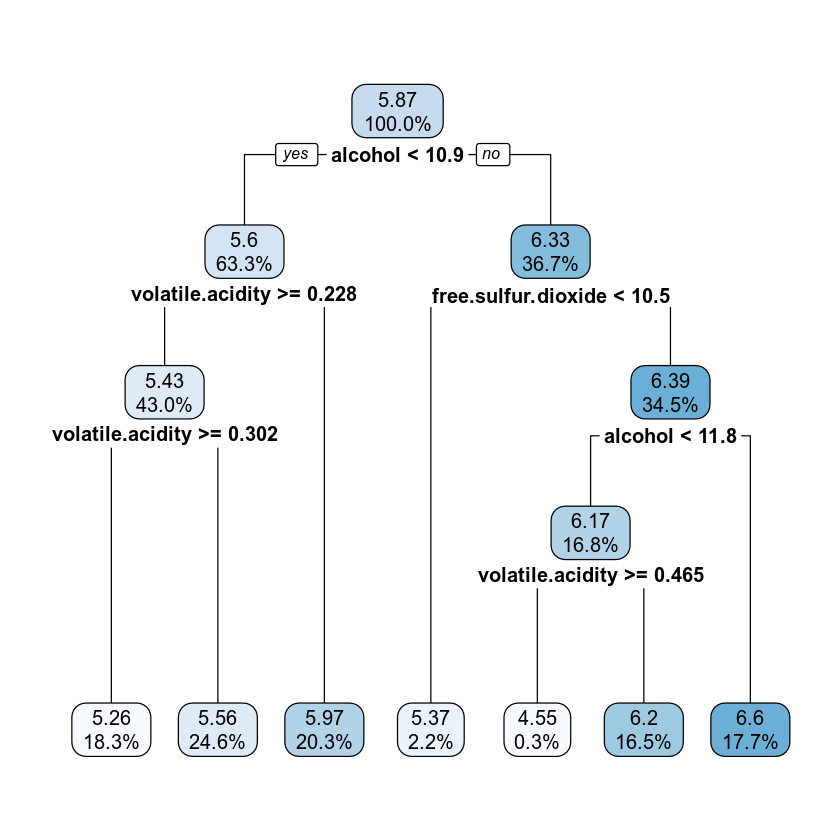

In [27]:
rpart.plot(m.rpart, digits = 3)

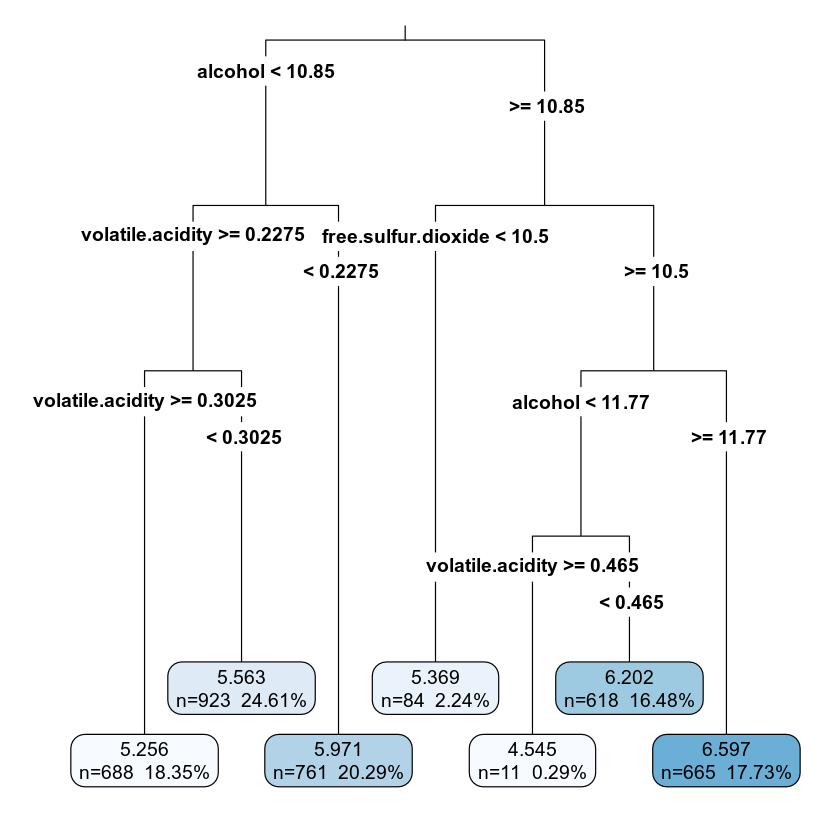

In [45]:
rpart.plot(m.rpart, digits = 4, fallen.leaves = T, type = 3, extra = 101)

In [63]:
p.rpart = predict(m.rpart, wine_test)

In [64]:
summary(p.rpart)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.545   5.563   5.971   5.893   6.202   6.597 

In [65]:
summary(wine_test$quality)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.000   5.000   6.000   5.901   6.000   9.000 

In [66]:
# problem - the predictions fall on a much narrower range 
# than the true values.
# model is incorrectly identifying extreme cases, but Q1, Q3 are OK.
# use correlation to measure the model's performance.

In [67]:
cor(p.rpart, wine_test$quality)

[1] 0.5369525

In [68]:
# this correlation is acceptable.
# correlation measures how strongly the predictions are related to the 
# true value; it is not a measure of how far off the predictions were
# from the true values

# Measuring performance with the MAE

$$MAE=\frac{1}{n}\sum_{i=1}^{n}{|e_i|}$$

In [69]:
MAE = function(actual, predicted) {
    mean(abs(actual - predicted))
}

In [70]:
MAE(p.rpart, wine_test$quality)

[1] 0.5872652

In [72]:
# the difference between model's pred. and the true quality is .587

In [73]:
mean(wine_train$quality)

[1] 5.870933

In [74]:
MAE(5.87, wine_test$quality)

[1] 0.6722474

In [93]:
# model tree improves on regression trees by replacing the leaf nodes
# with regression models.
# M5P(dv ~ iv, data)
# predict(m, test)

In [78]:
library(RWeka)

In [79]:
m.m5p = M5P(quality ~ ., data = wine_train)

In [83]:
# nodes terminate in a linear model
m.m5p

M5 pruned model tree:
(using smoothed linear models)

alcohol <= 10.85 : 
|   volatile.acidity <= 0.237 : 
|   |   fixed.acidity <= 6.85 : LM1 (406/66.024%)
|   |   fixed.acidity >  6.85 : 
|   |   |   free.sulfur.dioxide <= 24.5 : LM2 (113/87.697%)
|   |   |   free.sulfur.dioxide >  24.5 : 
|   |   |   |   alcohol <= 9.15 : 
|   |   |   |   |   citric.acid <= 0.305 : 
|   |   |   |   |   |   residual.sugar <= 14.45 : 
|   |   |   |   |   |   |   residual.sugar <= 13.8 : 
|   |   |   |   |   |   |   |   chlorides <= 0.052 : LM3 (6/77.537%)
|   |   |   |   |   |   |   |   chlorides >  0.052 : LM4 (13/0%)
|   |   |   |   |   |   |   residual.sugar >  13.8 : LM5 (11/0%)
|   |   |   |   |   |   residual.sugar >  14.45 : LM6 (12/0%)
|   |   |   |   |   citric.acid >  0.305 : 
|   |   |   |   |   |   total.sulfur.dioxide <= 169.5 : 
|   |   |   |   |   |   |   total.sulfur.dioxide <= 161.5 : 
|   |   |   |   |   |   |   |   pH <= 3.355 : 
|   |   |   |   |   |   |   |   |   volatile.acidity 

In [92]:
# LM num: 1
# quality =
#     0.266 * fixed.acidity 
#     - 2.3082 * volatile.acidity
# for an increase of 1 unit of acidity, the wine quality is
# expected to increase by .266

In [85]:
summary(m.m5p)


=== Summary ===

Correlation coefficient                  0.6666
Mean absolute error                      0.5151
Root mean squared error                  0.6614
Relative absolute error                 76.4921 %
Root relative squared error             74.6259 %
Total Number of Instances             3750     

In [86]:
p.m5p = predict(m.m5p, wine_test)

In [87]:
summary(p.m5p)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.389   5.430   5.863   5.874   6.305   7.437 

the model tree appears to be predicting a wider range of values than the regression tree

In [89]:
cor(p.m5p, wine_test$quality)

[1] 0.6272973

the correlation also seems to be substantially higher

In [94]:
MAE(wine_test$quality, p.m5p)

[1] 0.5463023

the model has slightly reduced the mean absolute error